# Gold Price Prediction

# Data Description

This is the Gold Price Dataset.The dataset gives you information about a gold prices based on several other stock prices as given below in which you will have to analyze the gold price and build best machine learning model to predict the gold price

# Data set columns

Date - mm/dd/yyyy

PX - is a free-float weighed measurement stock market index of the 500 largest companies listed on stock exchanges in the united states.

GLD - Gold Price

SLV - Silver Price

EUR/USD - Currency pair quotation of the Euro against the US

# Importing the Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
# Data Collecting and Processing

In [3]:
df = pd.read_csv('gld_price_data.csv')

In [4]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# find the number of rows and columns
df.shape

(2290, 6)

In [6]:
# check the df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Exploratary Data Analysis

In [9]:
# find features with one value

for column in df.columns:
    print(column,df[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


In [10]:
correlation = df.corr()

<AxesSubplot:>

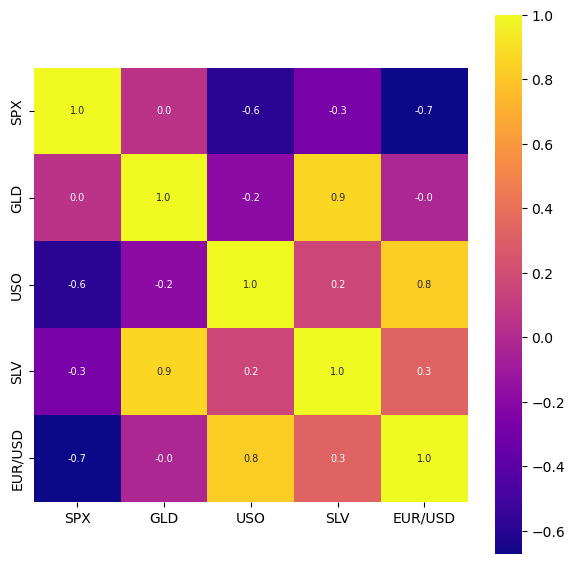

In [11]:
plt.figure(figsize = (7,7))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':7}, cmap='plasma')

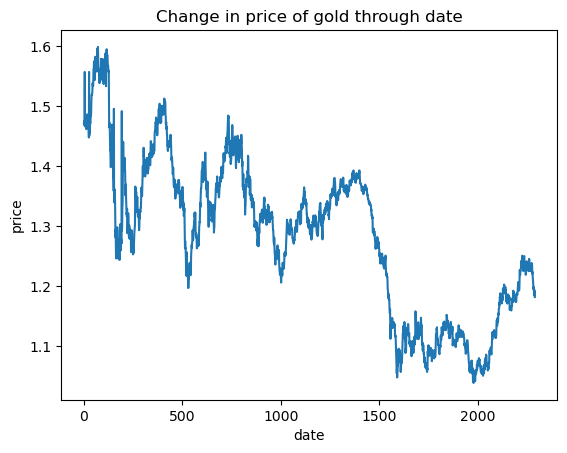

In [12]:
df["EUR/USD"].plot()
plt.title("Change in price of gold through date")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Density'>

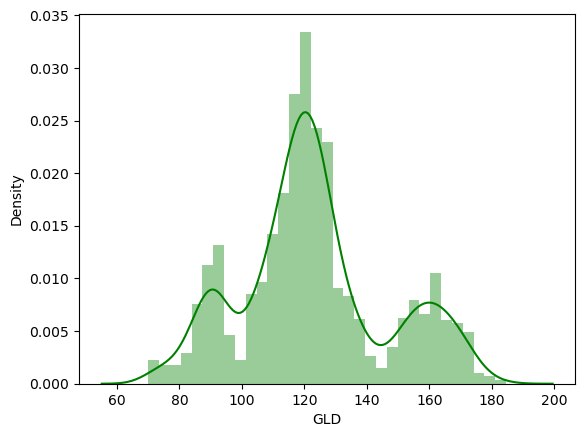

In [14]:
sns.distplot(df['GLD'],color='green')

In [15]:
print(df.skew(axis=0, skipna=True))

SPX        0.300362
GLD        0.334138
USO        1.699331
SLV        1.153641
EUR/USD   -0.005292
dtype: float64


In [16]:
df["USO"] = df["USO"].apply(lambda x: np.sqrt(x))

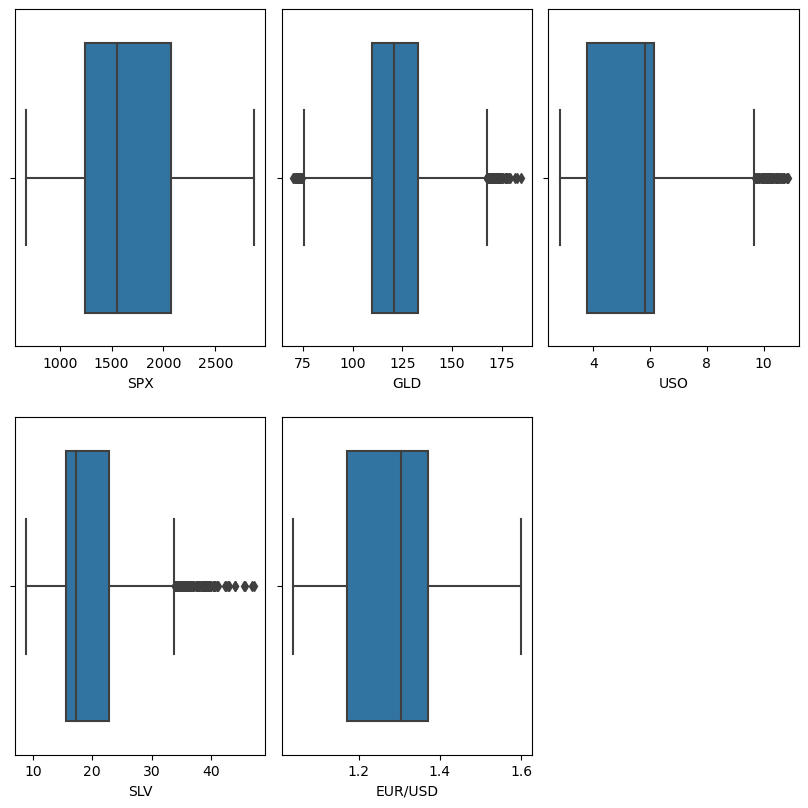

In [17]:
fig = plt.figure(figsize=(8, 8))
temp = df.drop("Date", axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x=item)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [18]:
def outlier_removal(column):
    upper_limit = column.quantile(.95)
    lower_limit = column.quantile(.05)
    column.loc[(column > upper_limit)] = upper_limit
    column.loc[(column < lower_limit)] = lower_limit
    return column

In [19]:
df[['SPX', 'GLD', 'USO', 'EUR/USD']] = df[['SPX', 'GLD', 'USO', 'EUR/USD']].apply(outlier_removal)

In [20]:
missing_values = df.isnull().sum()
print(missing_values)

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


In [21]:
df.dropna(inplace=True)

In [22]:
missing_values = df.isnull().sum()
print(missing_values)

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


In [23]:
# splitting the Features and Target

In [24]:
x = df.drop(['Date','GLD'],axis=1)
y = df['GLD']

In [25]:
print(x)

              SPX       USO      SLV   EUR/USD
0     1447.160034  8.830510  15.1800  1.471692
1     1447.160034  8.830510  15.2850  1.474491
2     1411.630005  8.792610  15.1670  1.475492
3     1416.180054  8.689074  15.0530  1.468299
4     1390.189941  8.721238  15.5900  1.491295
...           ...       ...      ...       ...
2285  2588.071045  3.749667  15.5100  1.186789
2286  2588.071045  3.790778  15.5300  1.184722
2287  2588.071045  3.796051  15.7400  1.191753
2288  2588.071045  3.792097  15.5600  1.193118
2289  2588.071045  3.795497  15.4542  1.182033

[2290 rows x 4 columns]


In [26]:
print(y)

0        86.816000
1        86.816000
2        86.816000
3        86.816000
4        86.816000
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [27]:
# splitting into Training data and test data

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25, random_state=2)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
RF = RandomForestRegressor(n_estimators=100)

In [31]:
# Training the model
RF.fit(xtrain,ytrain)

RandomForestRegressor()

In [32]:
rf_predict = RF.predict(xtest)

In [33]:
print(rf_predict)

[166.51888366  86.93421987 115.4288986  127.55290023 120.63160162
 154.65339751 150.7131983  126.07470008 117.95289874 125.97300037
 116.30550055 166.34028381 140.74889902 166.51991372 115.08359966
 117.64050025 139.47780241 166.5230039  160.1825937  155.46070187
 155.23100026 125.24759999 166.49037381 156.42170276 125.10730026
  94.19619993  86.8159999  120.25369981 119.19710008 166.3292036
  88.02244102 125.03030137  91.28650096 117.67349997 121.18539879
 136.33190055 115.54710132 115.34050091 147.58889971 107.3000011
 103.50580214  87.24345826 126.39449961 118.05369941 151.81899858
 120.02799972 108.35300066 107.98049852  93.12949988 127.00419796
  86.8159999  113.66469924 120.94670011 111.066299   118.93039871
 120.08269937 159.42919932 163.24534336 147.02869688  86.9487798
  93.85650034  87.19987968  90.46770028 118.49170088 126.5710012
 127.73069977 164.59056195 122.19529913 117.44799925  98.84100019
 166.3064822  143.01459799 132.73210221 121.37150205 121.84839927
 120.04760075 

In [34]:
from sklearn.metrics import r2_score

In [35]:
r2score = r2_score(ytest,rf_predict)
print("R squared error : ", r2score)

R squared error :  0.9901188760127176
